<a href="https://colab.research.google.com/github/jeenalmehta/DataAnalytics/blob/master/Experiment3_StatisticalAnalysis/Jeenal_DA_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Experiment 4** 

##Objective:
Building Linear Regression model for given dataset.

##About the dataset:

The file climate_change (CSV placed in lab folder) contains climate data from May 1983 to December 2008. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns
matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('climate_change.csv', sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [ ]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


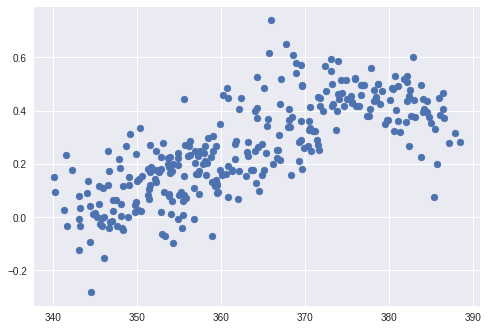

In [ ]:
X = df.iloc[:,3]
Y = df.iloc[:,10]

plt.scatter(X, Y)

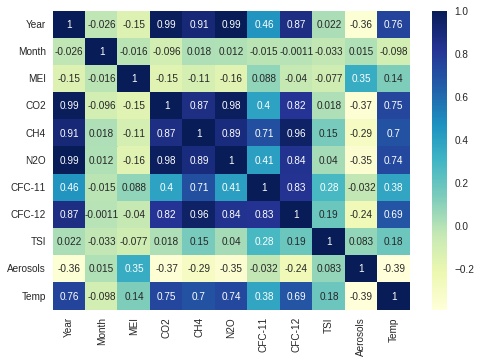

In [ ]:
# plotting correlation heatmap
dfplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# sns.set(rc={'figure.figsize':(107,80.27)})
# displaying heatmap
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
reg=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)

In [ ]:
X = df.drop('Temp' , axis=1)
y = df['Temp']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
cols = ['CFC-12', 'CFC-11', 'TSI', 'MEI', 'Aerosols']
reg.fit(X_train[cols],y_train)
y_pred = reg.predict(X_test[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
reg.score(X_train[cols], y_train)

0.7375243178789528

In [ ]:
r2_score(y_test, y_pred)

0.7289331723573503

## Problem 1.1:

The model R2 (the "Multiple R-squared" value) = 0.7289

In [ ]:
from scipy import stats

CATEGORICAL_VARIABLES = ['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']
for i in CATEGORICAL_VARIABLES:
  correlation = stats.pointbiserialr(df[i], df["Temp"])
  print(i, correlation)

MEI PointbiserialrResult(correlation=0.13529168433351066, pvalue=0.017518659805993233)
CO2 PointbiserialrResult(correlation=0.7485046457380211, pvalue=1.557880415620173e-56)
CH4 PointbiserialrResult(correlation=0.6996965803638929, pvalue=1.3362989047670364e-46)
N2O PointbiserialrResult(correlation=0.7432418337360966, pvalue=2.3517474412415498e-55)
CFC-11 PointbiserialrResult(correlation=0.3801113416532199, pvalue=5.031362179050227e-12)
CFC-12 PointbiserialrResult(correlation=0.6889441088656743, pvalue=1.1179206572557341e-44)
TSI PointbiserialrResult(correlation=0.18218560682875684, pvalue=0.0013215404069405788)
Aerosols PointbiserialrResult(correlation=-0.392069446275214, pvalue=9.283071094401667e-13)


It was seen that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05

In [ ]:
print("Co-efficient: ", reg.coef_)
print("Intercept: ",reg.intercept_)

Co-efficient:  [ 0.00380875 -0.00630687  0.09391288  0.06927627 -1.66581496]
Intercept:  -128.3295555498545


In [ ]:
y_pred_LR=reg.predict(X_test[cols])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  72.89331723573504


In [ ]:
dft = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
variables = ['Aerosols', 'N2O', 'MEI', 'TSI']
X_train, X_test, y_train, y_test = train_test_split(dft[variables], dft['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)
LR = LinearRegression_model.fit(X_train[variables],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [-2.18371947  0.02399865  0.06611947  0.07758969]
Intercept:  -113.21600162171521


In [ ]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)


 The Score Linear Regression  63.38409995422527


##Problem 2.1

All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. To verify this, I experimented with removing/adding some of the variables and found that the coefficient values varied, showing that it was dependent on the coefficient values of other variables. The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7) The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)

## Problem 3

The coefficient of N2O in this reduced model is 0.02399865. The r2 value obtained by this model is 0.6338 which is quiet low. Also, the previous model had no N2O variable as its independent variable.